Criterios para la Selección de Proyectos Individuales
===

Notas de clase sobre ingeniería economica avanzada usando Python

**Juan David Velásquez Henao**  
jdvelasq@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

**Software utilizado**
>Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org/) , en el cual se presenta un tutorial sobre finanzas corporativas usando Python. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.  

>Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

>Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en Try [Jupyter!](https://try.jupyter.org/)



#### Contenido

>

**Bibliografía**

> * [1] SAS/ETS 14.1 User's Guide, 2015.   
* [2] **hp** 12c platinum financial calculator. User's guide. 
* [3] HP Business Consultant II Owner's manual.
* [4] C.S. Park and G.P. Sharp-Bette. Advanced Engineering Economics. John Wiley & Sons, Inc., 1990.

In [11]:
import numpy.random as rdn
import cashflow as cf

In [12]:
## se construye una función que recibe la información relevante y retorn el npv

def project(marr,
            costo,
            inversion):
    
    
    precio      = rdn.triangular(  8,  10,  12, 11).tolist()
    produccion  = rdn.triangular( 80, 100, 120, 11).tolist()
    
    
    ingre = cf.Cashflow(10, spec = [(t, precio[t] * produccion[t]) if t > 0 else (0,0) for t in range(11)])    
    opera = cf.Cashflow(10, spec = [(t, costo)                     if t > 0 else (0,0) for t in range(11)])
    inver = cf.Cashflow(10, spec = (0, inversion))
    dep   = cf.Depreciation(assetsdata = [(inversion, 0, 10, 0 )], method   = 'SL').depreciation()
    
    antes = ingre - opera - inver - dep
    desp  = cf.afterTaxCashflow(antes, 0.30)
    
    neto  = antes + dep
    
    npv   = cf.npv(marr, neto)
    
    return npv

In [13]:
project(0.1, 220, 2000)

5390.369919868284

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
result = []

for sim in range(1000):
    result.append(project(0.1, 220, 2000))
result[1:10]

[5300.937849845404,
 5178.182381345466,
 5208.611030501299,
 5318.423087341602,
 4674.191695174847,
 4965.085625870821,
 5288.215238859968,
 5288.406548012085,
 4910.297824805946]

(array([   8.,   28.,   82.,  156.,  235.,  224.,  145.,   81.,   30.,   11.]),
 array([ 4578.21252314,  4713.83215739,  4849.45179165,  4985.0714259 ,
         5120.69106016,  5256.31069441,  5391.93032867,  5527.54996292,
         5663.16959718,  5798.78923143,  5934.40886569]),
 <a list of 10 Patch objects>)

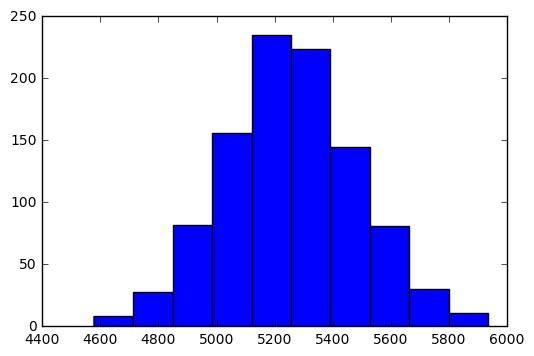

In [21]:
plt.hist(result)

---

**Ejercicio.--** Incluya en la simulación a las variables costo e inversión.

---

[Contenido](#Contenido)